In [175]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

def fashion_image(image_path):
    def cosine_similarity(embedding1, embedding2):
        return torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=1)
    
    # wild try - 
    # https://huggingface.co/laion/CLIP-ViT-L-14-laion2B-s32B-b82K
    # model = CLIPModel.from_pretrained("laion/CLIP-ViT-L-14-laion2B-s32B-b82K")
    # processor = CLIPProcessor.from_pretrained("laion/CLIP-ViT-L-14-laion2B-s32B-b82K")
    model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
    
    # Process image
    image_path = image_path  # Update the path to your image
    image_content = Image.open(image_path)
    
    # Text descriptions
    wearable_items = ["dress", "t-shirt", "jeans", "sneakers", "jacket", "hat", "scarf", "gloves", "sunglasses", "watch", "belt", "socks", "boots", "sandals", "tie", "suit", "sweater", "cardigan", "leggings", "swimsuit"]
    
    # Generate embeddings and calculate similarities
    inputs = processor(text=wearable_items, images=image_content, return_tensors="pt", padding=True)
    image_inputs = processor(images=[image_content], return_tensors="pt", padding=True)
    text_inputs = processor(text=wearable_items, return_tensors="pt", padding=True)
    # outputs = model(**inputs)
    image_outputs = model.get_image_features(**image_inputs)
    texts_outputs = model.get_text_features(**text_inputs)
    
    # text_embedding = outputs.text_embeds
    # image_embedding = outputs.image_embeds
    text_embedding = texts_outputs
    image_embedding = image_outputs
    
    scaled_similarity = []
    for i, text in enumerate(wearable_items):
        similarity = cosine_similarity(text_embedding[i], image_embedding).item()
        scaled_similarity.append((similarity + 1) / 2 * 100)  # Scaling to 0-100
    # scaled print
    paired_lists = list(zip(scaled_similarity, wearable_items))
    sorted_lists = sorted(paired_lists, key=lambda x: x[0], reverse=True)
    scaled_similarity, wearable_items = zip(*sorted_lists)
    normalized_items_list = [x / max(scaled_similarity) * 100 for x in scaled_similarity]
    image_content.thumbnail((500, 500))
    display(image_content)
    for i in range(len(wearable_items)):
        print(f"Similarity between text '{wearable_items[i]}' and image: {normalized_items_list[i]}")
        if i > 3:
            break

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


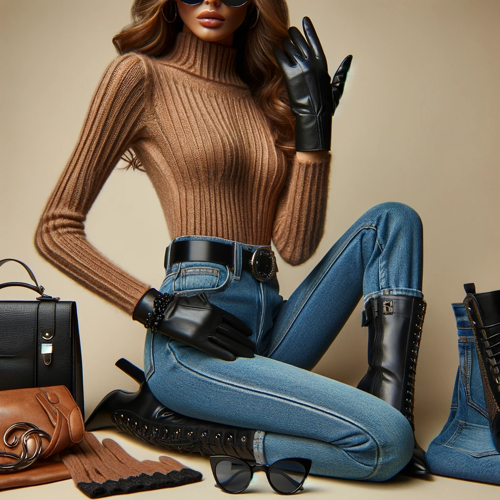

Similarity between text 'gloves' and image: 100.0
Similarity between text 'jeans' and image: 98.90475144841713
Similarity between text 'boots' and image: 98.7254509514696
Similarity between text 'belt' and image: 98.0942702247757
Similarity between text 'sunglasses' and image: 97.55158417469414


In [176]:
fashion_image("/home/user/Pictures/DALL·E 2024-01-18 21.47.18 - A fashion model wearing gloves, boots, sunglasses, and jeans, posing in a studio setting. The model should be stylish and contemporary, showcasing a c.png")

In [170]:
fashion_image("/home/user/Pictures/DALL·E 2024-01-18 21.47.18 - A fashion model wearing gloves, boots, sunglasses, and jeans, posing in a studio setting. The model should be stylish and contemporary, showcasing a c.png")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


RuntimeError: a Tensor with 20 elements cannot be converted to Scalar

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


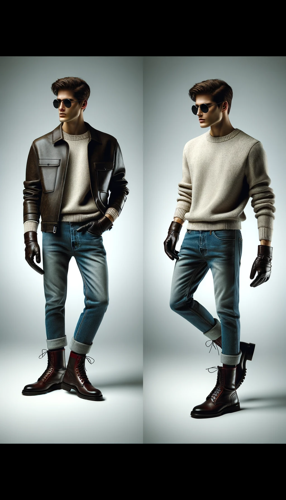

Similarity between text 'gloves' and image: 100.0
Similarity between text 'sunglasses' and image: 96.89281112351907
Similarity between text 'boots' and image: 96.79616743558334
Similarity between text 'jeans' and image: 95.77792197504556
Similarity between text 'jacket' and image: 95.16525841635203


In [128]:
fashion_image(("/home/user/Pictures//DALL·E 2024-01-18 21.39.26 - A full-body portrait of a fashion model in a studio, wearing gloves, boots, sunglasses, and jeans. The model should be depicted in a full-length pose,.png"))

In [140]:
import numpy as np
len(image_embedding[0].detach().numpy().tolist())

768

In [141]:
len(text_embedding[0].detach().numpy().tolist())

768

In [142]:
text_embedding[0].shape

torch.Size([768])

In [145]:
# Convert image embedding to JSON
image_embedding_numpy = image_embedding.detach().numpy()
image_embedding_list = image_embedding_numpy.tolist()
# Convert text embedding to JSON
text_embedding_numpy = text_embedding.detach().numpy()
text_embedding_list = text_embedding_numpy.tolist()
combined_data = {
    "image_embedding": image_embedding_list,
    "text_embedding": text_embedding_list
}
combined_data

{'image_embedding': [[0.07700128108263016,
   -0.012629929929971695,
   0.006479361560195684,
   0.08346575498580933,
   -0.0033414727076888084,
   0.03921923786401749,
   -0.006285524927079678,
   -0.007554030045866966,
   0.017582815140485764,
   -0.04700281843543053,
   -0.010899389162659645,
   0.0005957525572739542,
   0.01075442973524332,
   -0.01982499100267887,
   -0.039771515876054764,
   -0.015683436766266823,
   -0.04456445202231407,
   0.03726910054683685,
   -0.003810885827988386,
   -0.002204323187470436,
   -0.01771165058016777,
   0.0012234471505507827,
   -0.03420000150799751,
   -0.027933284640312195,
   -0.06866684556007385,
   -0.008974596858024597,
   0.020983392372727394,
   0.0022308938205242157,
   0.010014154016971588,
   -0.02737915888428688,
   0.026107314974069595,
   -0.0010636689839884639,
   -0.033947739750146866,
   -0.02103981375694275,
   0.037669532001018524,
   0.059381406754255295,
   0.009773148223757744,
   0.033725883811712265,
   -0.025921255350

In [146]:
type(text_embedding)

torch.Tensor

In [1]:
from transformers import CLIPProcessor, CLIPModel

# Download the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

# Save the model and processor to a directory
model.save_pretrained("models/model-clip-vit-large-patch14")
processor.save_pretrained("models/processor-clip-vit-large-patch14")

/home/user/miniconda3/envs/clip_open_ai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
from transformers import CLIPProcessor, CLIPModel

# Download the CLIP model and processor
model = CLIPModel.from_pretrained("models/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("models/clip-vit-large-patch14")